# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [2]:
#Resolver sistema de ecuaciones

#librerías
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[1,3],[1,2]])
b=np.array([1,0])
x=np.linalg.inv(A)@b
x

array([-2.,  1.])

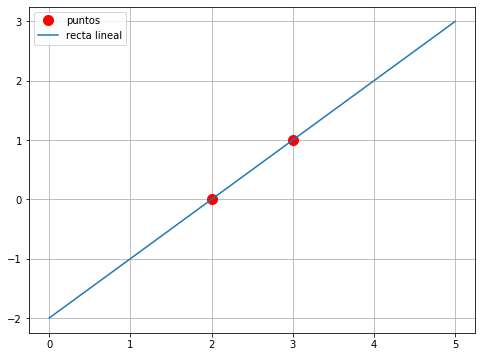

In [12]:
#Gráfica
px=[3,2]
py=[1,0]

plt.figure(figsize=(8,6))
plt.plot(px,py,'ro',ms=10,label='puntos')
xlin=np.linspace(0,5,100)
plt.plot(xlin,x[1]*xlin+x[0],label='recta lineal')
plt.legend(loc='best')
plt.grid()


2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [13]:
A=np.array([[1,0,0],[1,1,1],[1,2,4]])
b=np.array([1,0,1])
beta=np.linalg.inv(A)@b
beta

array([ 1., -2.,  1.])

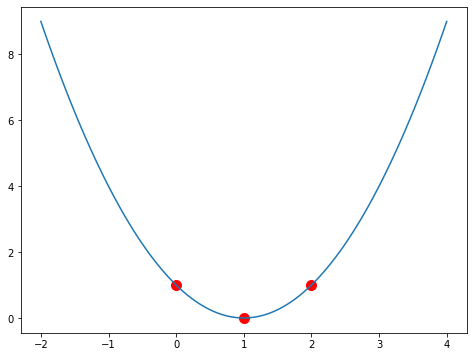

In [16]:
px=[0,1,2]
py=[1,0,1]

xlin=np.linspace(-2,4,100)
y=beta[2]*xlin**2+beta[1]*xlin+beta[0]

plt.figure(figsize=(8,6))
plt.plot(px,py,'ro',ms=10,label='Puntos')
plt.plot(xlin,y,label='parabola ajustada')

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [17]:
np.random.rand?

In [3]:
# Crear un conjunto de puntos ruidosos a partir de una recta
px=np.linspace(-1,5,100)
py=3*px-2+5*np.random.rand(100)

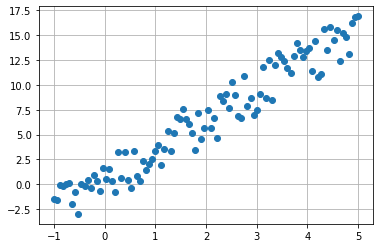

In [5]:
# Graficar
plt.plot(px,py,'o')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

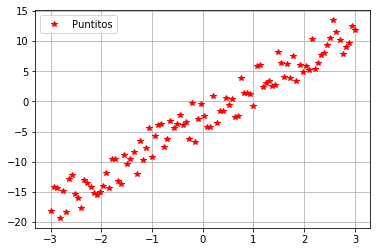

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-3,3,100)
y=5*x-6+7*np.random.rand(100)
plt.plot(x,y,'*r',label='Puntitos')
plt.legend(loc='best')
plt.grid()

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [10]:
import scipy.optimize as opt
#opt.minimize?

# definimos la función a minimizar (Con respecto a los parámetros beta)
def obj(beta,x,y):
    f=beta[0]+beta[1]*x # defninimos l función
    return np.sum((y-f)**2) # sumamos todos los componentes de la diferencia al cuadrado

In [12]:
beta0=[0,1] # valores iniciales para beta
res=opt.minimize(obj,beta0,args=(x,y)) # minimizamos obj en función de beta
res

      fun: 393.09084468093283
 hess_inv: array([[5.00000064e-03, 5.03928244e-11],
       [5.03928243e-11, 1.63366332e-03]])
      jac: array([ 0.00000000e+00, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-2.8056964 ,  4.81019138])

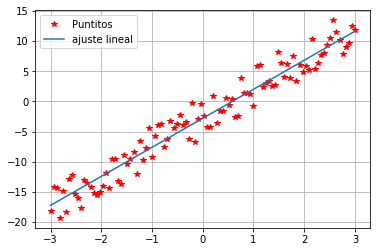

In [13]:
plt.plot(x,y,'*r',label='Puntitos')
plt.plot(x,res.x[0]+res.x[1]*x,label='ajuste lineal')
plt.legend(loc='best')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

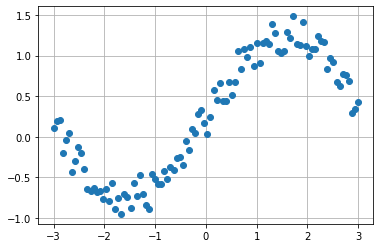

In [16]:
# Generamos 100 puntos ruidosos a partir de una senoidal
# dejmo' la misma x

y=np.sin(x)+0.5*np.random.rand(100)
plt.plot(x,y,'o',label='datos (bolitas)')
plt.grid()

In [17]:
# definimos la función objetivo
def obj(beta,x,y,n):
    f=beta@[x**i for i in range(n+1)] # genera un polinomio de grado n
    # range(n+1) genera un iterador de 0 hasta n
    return np.sum((y-f)**2)

In [18]:
# ajuste lineal
beta1=[0,1]
r1=opt.minimize(obj,beta1,args=(x,y,1))

#ajuste cuadrático
beta2=[0,1,1]
r2=opt.minimize(obj,beta2,args=(x,y,2))

#ajuste cúbico
beta3=[1,1,1,1]
r3=opt.minimize(obj,beta3,args=(x,y,3))

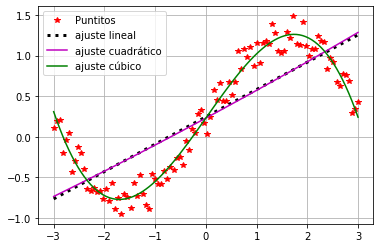

In [34]:
def f(beta,x,n):
    return beta@[x**i for i in range(n+1)]
plt.plot(x,y,'*r',label='Puntitos')
plt.plot(x,f(r1.x,x,1),'k:',lw=3,label='ajuste lineal')
plt.plot(x,f(r2.x,x,2),'m',label='ajuste cuadrático')
plt.plot(x,f(r3.x,x,3),'g',label='ajuste cúbico')
plt.legend(loc='best')
plt.grid()

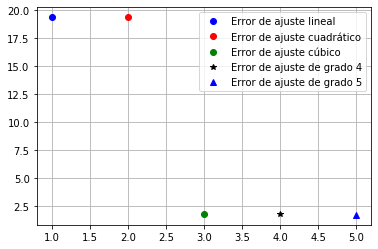

In [45]:
#r1.fun,r2.fun,r3.fun
#Errores de las regresiones

plt.plot(1,r1.fun,'ob',label='Error de ajuste lineal')
plt.plot(2,r2.fun,'or',label='Error de ajuste cuadrático')
plt.plot(3,r3.fun,'og',label='Error de ajuste cúbico')
plt.plot(4,r4.fun,'*k',label='Error de ajuste de grado 4')
plt.plot(5,r5.fun,'^b',label='Error de ajuste de grado 5')
plt.legend(loc='best')
plt.grid()

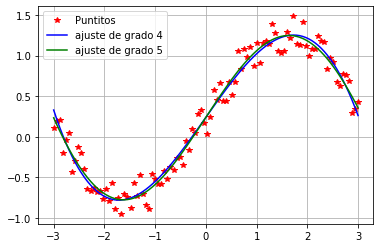

In [44]:
# Ajuste de grado 4
beta4=[1,1,1,1,1]
r4=opt.minimize(obj,beta4,args=(x,y,4))

# Ajuste de grado 5
beta5=[1,1,1,1,-1,1]
r5=opt.minimize(obj,beta5,args=(x,y,5))

plt.plot(x,y,'*r',label='Puntitos')
plt.plot(x,f(r4.x,x,4),'b',label='ajuste de grado 4')
plt.plot(x,f(r5.x,x,5),'g',label='ajuste de grado 5')
plt.grid()
plt.legend(loc='best')

In [49]:
r3.x

array([ 0.2293681 ,  0.88553214,  0.00499295, -0.09964673])

In [47]:
r4.x

array([ 0.23795769,  0.8855321 , -0.00436644, -0.09964673,  0.00118963])

In [48]:
r5.x

array([ 0.23795766,  0.95478627, -0.00436643, -0.13487106,  0.00118963,
        0.00345475])

In [52]:
# Ajuste de grado 10
beta10=np.ones((11,))
r10=opt.minimize(obj,beta10,args=(x,y,10))
r10

      fun: 1.6685805180366817
 hess_inv: array([[ 3.71090668e-02,  7.72173171e-05, -8.86625146e-02,
        -1.33365105e-04,  5.84074368e-02,  5.59574932e-05,
        -1.55462819e-02, -8.51907800e-06,  1.79681789e-03,
         4.29630212e-07, -7.50729822e-05],
       [ 7.72172914e-05,  1.33746740e-01, -2.67029904e-04,
        -1.51961038e-01,  2.03028471e-04,  5.33587017e-02,
        -5.84447758e-05, -7.33948875e-03,  7.10079463e-06,
         3.46148416e-04, -3.05239879e-07],
       [-8.86625146e-02, -2.67029926e-04,  3.78281690e-01,
         6.25020736e-04, -2.95591787e-01, -2.84665939e-04,
         8.54857277e-02,  4.50524124e-05, -1.03783037e-02,
        -2.32314149e-06,  4.47965305e-04],
       [-1.33365125e-04, -1.51961038e-01,  6.25020775e-04,
         2.05602395e-01, -5.09769990e-04, -7.86180298e-02,
         1.51120633e-04,  1.13757137e-02, -1.86443105e-05,
        -5.54826878e-04,  8.14558841e-07],
       [ 5.84074368e-02,  2.03028463e-04, -2.95591787e-01,
        -5.09769973e

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.